In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from qiskit import *
from qiskit import IBMQ

from qiskit.tools.visualization import plot_histogram
from IPython.display import display, Math, Latex
from qiskit.visualization import plot_state_qsphere

IBMQ.save_account('api-token')
provider = IBMQ.load_account()

configrc.store_credentials:WARNING:2023-04-23 22:38:57,467: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2023-04-23 22:38:58,520: Credentials are already in use. The existing account in the session will be replaced.


In [39]:
ibmq_backend = provider.get_backend("")
ibmq_backend.status()

# Build Bell States

Receive a state on two qubits $|xy\rangle$ and takes it to a given Bell State. This operation is done by applying the $U$ gate $U|x\rangle = |\beta_{xy}\rangle$ as follows,

$$
    \begin{align*}
        |\beta^{+}_{00}\rangle = \frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)\\
        |\beta^{-}_{01}\rangle = \frac{1}{\sqrt{2}}(|01\rangle+|10\rangle)\\
        |\beta^{+}_{10}\rangle = \frac{1}{\sqrt{2}}(|00\rangle-|11\rangle)\\
        |\beta^{-}_{11}\rangle = \frac{1}{\sqrt{2}}(|01\rangle-|10\rangle)\\
    \end{align*}
$$

Where $U$ defines an operation that generally applies a Hadamard gate $H$ on the first qubit and a $CNOT_{01}$. And circumstantially, depending on $xy$ applies a $X$ gate on $y$ and $Z$ on $x$.

In [29]:
def BuildBell(x, y):
    U = QuantumCircuit(2)
    
    U.h(0)
    U.cx(0, 1)
    
    if x == 1:
        U.cz(0, 1)
    if y == 1:
        U.x(1)
        
    U = U.to_gate()
    U.name = 'Build Bell'
    #ctl_U = U.control() make it a controlled gate
    
    return U

In [30]:
backend = BasicAer.get_backend('statevector_simulator')

No measurements in circuit "circuit-264", classical register will remain all zeros.
No measurements in circuit "circuit-268", classical register will remain all zeros.
No measurements in circuit "circuit-272", classical register will remain all zeros.
No measurements in circuit "circuit-276", classical register will remain all zeros.


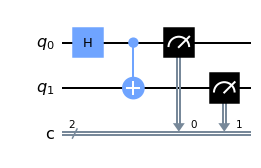

In [32]:
n = 2

#bell state 00
[x, y] = [0, 0]
b00 = QuantumCircuit(n, n)
b00.append(BuildBell(x, y), range(n))

#bell state 01
[x, y] = [0, 1]
b01 = QuantumCircuit(n, n)
b01.append(BuildBell(x, y), range(n))

#bell state 10
[x, y] = [1, 0]
b10 = QuantumCircuit(n, n)
b10.append(BuildBell(x, y), range(n))

#bell state 11
[x, y] = [1, 1]
b11 = QuantumCircuit(n, n)
b11.append(BuildBell(x, y), range(n))

bqs00 = execute(b00, backend).result()
bqs01 = execute(b01, backend).result()
bqs10 = execute(b10, backend).result()
bqs11 = execute(b11, backend).result()

#GENERAL CIRCUIT b_00
bxy = QuantumCircuit(n, n)
bxy.h(0)
bxy.cx(0, 1)
bxy.measure(range(n), range(n))

backend = BasicAer.get_backend('qasm_simulator')
atp = 1024
res = execute(bxy, backend=lima_backend, shots=atp).result()
ans = res.get_counts()

bxy.draw('mpl')

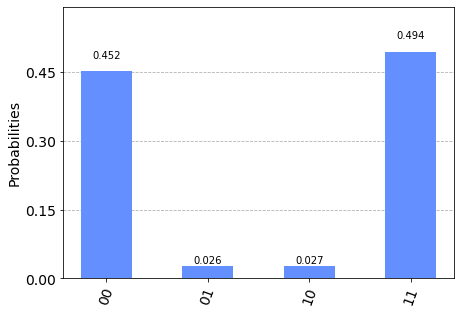

In [35]:
plot_histogram(ans)

In [36]:
plot_state_qsphere(bqs00.get_statevector(b00)) #bell state 00 qsphere

QiskitError: 'No statevector for experiment "<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x1489cbcd0>"'

In [37]:
plot_state_qsphere(bqs01.get_statevector(b01)) #bell state 01 qsphere

QiskitError: 'No statevector for experiment "<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x1489cba60>"'

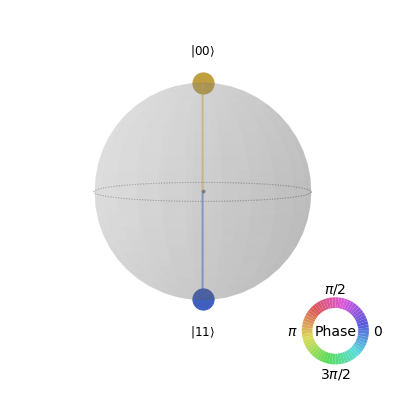

In [13]:
plot_state_qsphere(bqs10.get_statevector(b10)) #bell state 10 qsphere

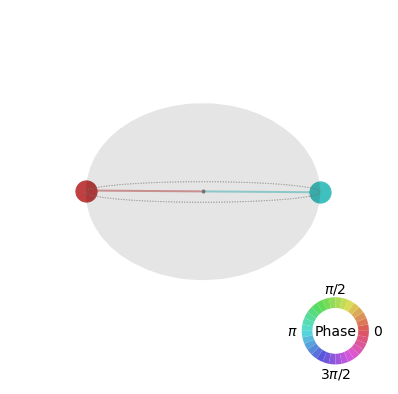

In [9]:
plot_state_qsphere(bqs11.get_statevector(b11)) #bell state 11 qsphere